In [1]:
  # importing lib 
# no change required. 
# how will we compare the performance , we will run our algorithm on blind data set, i need to build a custom loss function for the algorithm. 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os 
os.chdir('/content/drive/MyDrive/Lithofacies')

In [5]:
ADM = pd.read_csv("train_lf.csv", sep = ';')


In [7]:
# ADM['RDEP'].fillna('D4', inplace = True) 
# ADM['RDEP'].value_counts(dropna = False)

In [6]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

# df = df.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_keys})
# df['DiffCminB'] = df['CALI'] - df['BS']
ADM = ADM.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_keys})
# ADM['DiffCminB'] = ADM['CALI'] - ADM['BS']


# df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'Lithofacies'}, inplace=True)

# df.rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE':'Confidence'}, inplace=True)

ADM.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'Lithofacies'}, inplace=True)

ADM.rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE':'Confidence'}, inplace=True)

In [8]:


# # ADM.describe()
# # ADM['GR'] = ADM['GR'].clip(0,200)
# # ADM['RDEP'] = ADM['RDEP'].clip(0,100) # initially was 10, now we are keeping it at 30 # now based on - https://wiki.aapg.org/Well_log_analysis_for_reservoir_characterization
# # ADM['DTS'] = ADM['DTS'].clip(0,300)
# # ADM['SP'] = ADM['SP'].clip(-200,200)
# # ADM['PEF'] = ADM['PEF'].clip(0,10)  #
# # ADM['RHOB'] = ADM['RHOB'].clip(1,3)
# # ADM['NPHI'] = ADM['NPHI'].clip(0,0.6)
# # ADM['DiffCminB'] = ADM['DiffCminB'].clip(-0.5,0.5)

# cut_labels_4 = ['bronze', 'silver', 'gold', 'platinum', 'diamond']
# # cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext_price'], bins =5,  labels=cut_labels_4) # bins=cut_bins,

# df['ext_price'] = np.where((df['ext_price']<=2) | (df['ext_price']>=10)   , np.nan, df['ext_price'])

# # ADM['GR'] = np.array(np.where((ADM['GR'] <= 0) | (ADM['GR'] >=200), np.nan, ADM['GR']))

# # label_gr = ['G0' , 'G1', 'G2', 'G3']
# # ADM['MGR'] = np.array(pd.cut(ADM['GR'], bins = 4, labels = label_gr))
# # ADM['MGR'].value_counts(dropna = False) 
# # ADM['GR'].describe()

In [9]:
ADM['GR'] = np.array(np.where((ADM['GR'] <= 0) | (ADM['GR'] >=200), np.nan, ADM['GR']))
ADM['RDEP'] =np.array(np.where((ADM['RDEP'] <= 0) | (ADM['RDEP'] >= 100 ), np.nan, ADM['RDEP']  ))
# ADM['DTS'] =np.array(np.where((ADM['DTS'] <= 0) | (ADM['DTS'] >=300 ), np.nan, ADM['DTS']  ))
# ADM['SP'] =np.array(np.where((ADM['SP'] <= -200) | (ADM['SP'] >= 200), np.nan, ADM['SP']  ))
ADM['PEF'] =np.array(np.where((ADM['PEF'] <=0 ) | (ADM['PEF'] >=10 ), np.nan, ADM['PEF']  ))
ADM['RHOB'] = np.array(np.where((ADM['RHOB'] <= 1) | (ADM['RHOB'] >= 3), np.nan, ADM['RHOB'])  )
ADM['NPHI'] = np.array(np.where((ADM['NPHI'] <= 0) | (ADM['NPHI'] >= 0.6), np.nan, ADM['NPHI'])  )
# ADM['DiffCminB'] = np.array(np.where((ADM['DiffCminB'] <= -0.5) | (ADM['DiffCminB'] >=0.5), np.nan, ADM['DiffCminB']))
ADM['DTC'] =np.array(np.where((ADM['DTC'] <= 0) | (ADM['DTC'] >=300 ), np.nan, ADM['DTC']  ))

In [10]:
ADM['temp3'] = ADM['RHOB']*ADM['NPHI']

ADM['temp4'] = ADM['RHOB']*ADM['DTC']

ADM['temp5'] = ADM['NPHI']*ADM['DTC']


ADM['temp6'] = ADM['GR']*ADM['NPHI']

ADM['temp7'] = ADM['GR']*ADM['RHOB']

ADM['temp8'] = ADM['GR']*ADM['DTC']


ADM['temp9'] = ADM['GR']*ADM['NPHI']*ADM['RHOB']

ADM['temp10'] = ADM['GR']*ADM['RHOB']*ADM['DTC']

ADM['temp11'] = ADM['GR']*ADM['DTC']*ADM['NPHI']

ADM['temp12'] = ADM['DTC']*ADM['NPHI']*ADM['RHOB']

In [11]:
ADM['temp13'] = ADM['PEF']*ADM['NPHI']

ADM['temp14'] = ADM['PEF']*ADM['RHOB']

ADM['temp15'] = ADM['PEF']*ADM['DTC']

ADM['temp16'] = ADM['PEF']*ADM['GR']





ADM['temp17'] = ADM['PEF']*ADM['NPHI']*ADM['RHOB']

ADM['temp18'] = ADM['PEF']*ADM['RHOB']*ADM['DTC']

ADM['temp19'] = ADM['PEF']*ADM['DTC']*ADM['NPHI']

ADM['temp20'] = ADM['GR']*ADM['NPHI']*ADM['PEF']

ADM['temp21'] = ADM['GR']*ADM['RHOB']*ADM['PEF']

ADM['temp22'] = ADM['GR']*ADM['DTC']*ADM['PEF']



In [12]:
ADM['temp3'] = np.array(np.where((ADM['temp3'] <= 0) | (ADM['temp3'] >=1.25), np.nan, ADM['temp3']))

ADM['temp4'] = np.array(np.where((ADM['temp4'] <= 120) | (ADM['temp4'] >=300), np.nan, ADM['temp4']))


ADM['temp5'] = np.array(np.where((ADM['temp5'] <= 0) | (ADM['temp5'] >=80), np.nan, ADM['temp5']))


ADM['temp6'] = np.array(np.where((ADM['temp6'] <= 0) | (ADM['temp6'] >=60), np.nan, ADM['temp6']))


ADM['temp7'] = np.array(np.where((ADM['temp7'] <= 0) | (ADM['temp7'] >=300), np.nan, ADM['temp7']))


ADM['temp8'] = np.array(np.where((ADM['temp8'] <= 0) | (ADM['temp8'] >=15000), np.nan, ADM['temp8']))


ADM['temp9'] = np.array(np.where((ADM['temp9'] <= 0) | (ADM['temp9'] >=100), np.nan, ADM['temp9']))


ADM['temp10'] = np.array(np.where((ADM['temp10'] <= 0) | (ADM['temp10'] >=40000), np.nan, ADM['temp10']))


ADM['temp11'] = np.array(np.where((ADM['temp11'] <= 0) | (ADM['temp11'] >=6000), np.nan, ADM['temp11']))

ADM['temp12'] = np.array(np.where((ADM['temp12'] <= 0) | (ADM['temp12'] >=175), np.nan, ADM['temp12']))



In [13]:
ADM['temp13'] = np.array(np.where((ADM['temp13'] <= 0) | (ADM['temp13'] >=3), np.nan, ADM['temp13']))

ADM['temp14'] = np.array(np.where((ADM['temp14'] <= 0) | (ADM['temp14'] >=20), np.nan, ADM['temp14']))


ADM['temp15'] = np.array(np.where((ADM['temp15'] <= 0) | (ADM['temp15'] >=800), np.nan, ADM['temp15']))


ADM['temp16'] = np.array(np.where((ADM['temp16'] <= 0) | (ADM['temp16'] >=400), np.nan, ADM['temp16']))


ADM['temp17'] = np.array(np.where((ADM['temp17'] <= 0) | (ADM['temp17'] >=6), np.nan, ADM['temp17']))


ADM['temp18'] = np.array(np.where((ADM['temp18'] <= 0) | (ADM['temp18'] >=2000), np.nan, ADM['temp18']))


ADM['temp19'] = np.array(np.where((ADM['temp19'] <= 0) | (ADM['temp19'] >=400), np.nan, ADM['temp19']))


ADM['temp20'] = np.array(np.where((ADM['temp20'] <= 0) | (ADM['temp20'] >=190), np.nan, ADM['temp20']))


ADM['temp21'] = np.array(np.where((ADM['temp21'] <= 0) | (ADM['temp21'] >=1200), np.nan, ADM['temp21']))

ADM['temp22'] = np.array(np.where((ADM['temp22'] <= 0) | (ADM['temp22'] >=50000), np.nan, ADM['temp22']))



In [14]:
b = 8
label_gr = ['G0' , 'G1', 'G2', 'G3', 'G4']
ADM['MGR'] = np.array(pd.cut(ADM['GR'], bins = [0,20,35,60,100,200], labels = label_gr))
ADM['MGR'].fillna('G5', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1', 'R2', 'R3']
ADM['MRDEP'] = np.array(pd.cut(ADM['RDEP'], bins = [0,5,20,40,100], labels = label_RD))
ADM['MRDEP'].fillna('R4', inplace = True)



label_DT = ['D0' , 'D1', 'D2', 'D3']
ADM['MDTC'] = np.array(pd.cut(ADM['DTC'], bins = [0,70,95,110,300], labels = label_DT))
ADM['MDTC'].fillna('D4', inplace = True)



# label_SP = ['S0' , 'S1', 'S2', 'S3']
# ADM['MSP'] = np.array(pd.cut(ADM['SP'], bins = [], labels = label_SP))
# ADM['MSP'].fillna('S4', inplace = True)



label_PE = ['P0' , 'P1', 'P2', 'P3']
ADM['MPEF'] = np.array(pd.cut(ADM['PEF'], bins = [0,3.8,4.8,6,10], labels = label_PE))
ADM['MPEF'].fillna('P4', inplace = True)



label_B = ['B0' , 'B1', 'B2', 'B3','B4']
ADM['MRHOB'] = np.array(pd.cut(ADM['RHOB'], bins = [1,2,2.2,2.35,2.6,3], labels = label_B))
ADM['MRHOB'].fillna('B5', inplace = True)



label_NP = ['N0' , 'N1', 'N2', 'N3']
ADM['MNPHI'] = np.array(pd.cut(ADM['NPHI'], bins = [0,0.1,0.2,0.3,0.6], labels = label_NP))
ADM['MNPHI'].fillna('N4', inplace = True)


# label_DCB = ['C0' , 'C1', 'C2', 'C3']
# ADM['MDCMB'] = np.array(pd.cut(ADM['DiffCminB'], bins = b, labels = label_DCB)   )
# ADM['MDCMB'].fillna('C4', inplace = True)


In [15]:

label_gr = ['G0' , 'G1', 'G2', 'G3', 'G4']
ADM['Mtemp3'] = np.array(pd.cut(ADM['temp3'], bins = [0,0.2,0.55,0.75,0.85,1.25], labels = label_gr))
ADM['Mtemp3'].fillna('G5', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1', 'R2', 'R3', 'R4']
ADM['Mtemp4'] = np.array(pd.cut(ADM['temp4'], bins = [120,150,170,200,260,300], labels = label_RD))
ADM['Mtemp4'].fillna('R5', inplace = True)


label_RD = ['R0' , 'R1', 'R2', 'R3', 'R4']
ADM['Mtemp5'] = np.array(pd.cut(ADM['temp5'], bins = [0,5,10,20,45,80], labels = label_RD))
ADM['Mtemp5'].fillna('R5', inplace = True)


label_DT = ['D0' , 'D1', 'D2']
ADM['Mtemp6'] = np.array(pd.cut(ADM['temp6'], bins = [0,4,20,60], labels = label_DT))
ADM['Mtemp6'].fillna('D3', inplace = True)


label_gr = ['R0' , 'R1', 'R2']
ADM['Mtemp7'] = np.array(pd.cut(ADM['temp7'], bins = [0,20,80,300], labels = label_gr))
ADM['Mtemp7'].fillna('R3', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1', 'R2']
ADM['Mtemp8'] = np.array(pd.cut(ADM['temp8'], bins = [0,1000,3500,15000], labels = label_RD))
ADM['Mtemp8'].fillna('R3', inplace = True)


label_RD = ['R0' , 'R1', 'R2']
ADM['Mtemp9'] = np.array(pd.cut(ADM['temp9'], bins = [0,20,30,100], labels = label_RD))
ADM['Mtemp9'].fillna('R3', inplace = True)


label_DT =  ['R0' , 'R1', 'R2', 'R3']
ADM['Mtemp10'] = np.array(pd.cut(ADM['temp10'], bins = [0,5000,8000,16000,40000], labels = label_DT))
ADM['Mtemp10'].fillna('R4', inplace = True)

label_DT = ['R0' , 'R1', 'R2', 'R3']
ADM['Mtemp11'] = np.array(pd.cut(ADM['temp11'], bins = [0,150,400,3000,6000], labels = label_DT))
ADM['Mtemp11'].fillna('R4', inplace = True)

label_DT = ['R0' , 'R1', 'R2', 'R3', 'R4']
ADM['Mtemp12'] = np.array(pd.cut(ADM['temp12'], bins = [0,20,35,70,100,175], labels = label_DT))
ADM['Mtemp12'].fillna('R5', inplace = True)




In [16]:

label_gr = ['G0' , 'G1', 'G2']
ADM['Mtemp13'] = np.array(pd.cut(ADM['temp13'], bins = [0,0.2,1,3], labels = label_gr))
ADM['Mtemp13'].fillna('G5', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1']
ADM['Mtemp14'] = np.array(pd.cut(ADM['temp14'], bins = [0,10,20], labels = label_RD))
ADM['Mtemp14'].fillna('R5', inplace = True)


label_RD = ['R0' , 'R1', 'R2']
ADM['Mtemp15'] = np.array(pd.cut(ADM['temp15'], bins = [0,300,450,800], labels = label_RD))
ADM['Mtemp15'].fillna('R5', inplace = True)


label_DT = ['D0' , 'D1', 'D2']
ADM['Mtemp16'] = np.array(pd.cut(ADM['temp16'], bins = [0,180,220,400], labels = label_DT))
ADM['Mtemp16'].fillna('D3', inplace = True)


label_gr = ['R0' , 'R1', 'R2']
ADM['Mtemp17'] = np.array(pd.cut(ADM['temp17'], bins = [0,0.5,3,6], labels = label_gr))
ADM['Mtemp17'].fillna('R3', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1', 'R2','R5']
ADM['Mtemp18'] = np.array(pd.cut(ADM['temp18'], bins = [0,600,750,1100,2000], labels = label_RD))
ADM['Mtemp18'].fillna('R3', inplace = True)


label_RD = ['R0' , 'R1', 'R2','R4']
ADM['Mtemp19'] = np.array(pd.cut(ADM['temp19'], bins = [0,20,70,180,400], labels = label_RD))
ADM['Mtemp19'].fillna('R3', inplace = True)


label_DT =  ['R0' , 'R1', 'R2', 'R3', 'R5']
ADM['Mtemp20'] = np.array(pd.cut(ADM['temp20'], bins = [0,10,30,60,120,190], labels = label_DT))
ADM['Mtemp20'].fillna('R4', inplace = True)

label_DT = ['R0' , 'R1', 'R2']
ADM['Mtemp21'] = np.array(pd.cut(ADM['temp21'], bins = [0,300,450,1200], labels = label_DT))
ADM['Mtemp21'].fillna('R4', inplace = True)

label_DT = ['R0' , 'R1', 'R2']
ADM['Mtemp22'] = np.array(pd.cut(ADM['temp22'], bins = [0,10000,25000,50000], labels = label_DT))
ADM['Mtemp22'].fillna('R5', inplace = True)




In [17]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
# data = asarray([['red'], ['green'], ['blue']])
# print(data)

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
ADM_one_hot = encoder.fit_transform(ADM[[ 'Mtemp13', 'Mtemp14', 'Mtemp15',
       'Mtemp16', 'Mtemp17', 'Mtemp18', 'Mtemp19', 'Mtemp20', 'Mtemp21',
       'Mtemp22', 'Mtemp3', 'Mtemp4', 'Mtemp5', 'Mtemp6', 'Mtemp7', 'Mtemp8',
       'Mtemp9', 'Mtemp10', 'Mtemp11', 'Mtemp12', 'MGR', 'MRDEP', 'MDTC',        'MPEF', 'MRHOB', 'MNPHI']])
print(ADM_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [18]:
ADM_one_hot.shape

(1170511, 125)

In [20]:
a = 0 
b = 10
test_sz = 7
# y = ADM['Lithofacies']
# x = ADM[['GR', 'NPHI', 'RHOB', 'DTS', 'SP', 'DiffCminB', 'PEF', 'RDEP']]
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(ADM_one_hot,ADM['Lithofacies'], random_state = int(b), test_size= (test_sz/10), stratify = ADM['Lithofacies'])

In [ ]:
# Grid search, cross validation ## 
from sklearn.ensemble import RandomForestClassifier
grid = { 
    'n_estimators': [100,500],
#     'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,20, 100],
    
    'min_samples_split':[2,4, 10, 100], 
    'random_state' : [0]
}
# 'criterion' :['entropy'],
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 3)
rf_cv.fit(X_train, Y_train)
rf_cv.best_estimator_

In [ ]:
from sklearn.metrics import classification_report
classification_report(Y_test,rf_cv.best_estimator_.predict(X_test))

In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators = 2000, max_depth=20,  min_samples_split=2,  random_state=0)
# X = temp_adm_train[order3] 
# X = ADM_one_hot # ADM[['MGR', 'MRDEP', 'MDTC', 'MSP', 'MPEF', 'MRHOB', 'MNPHI', 'MDTC']]
# y = ADM['Lithofacies']
clf.fit(X_train, Y_train)
tempa = clf.predict(X_test)


true_lithofacies = Y_test # ADM['Lithofacies']

predicted_output = tempa
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




Confusion matrix:
[[   855      0      0      0      1     37     21      2     36      8
      17      0]
 [     0     80      0      0      0      0      9      1      1      0
       2      0]
 [     0      0   6938      0      0      0   1167     32    942    245
     132      6]
 [     1      0      1   2042      0      0     10      3    442     72
     865      2]
 [     6      0      1      0    359      0     46     10    153     45
     879     20]
 [    15      0      0      0      0   7349      0      0      1      0
      27      0]
 [    10      1    939      5     27      0  31219   1243   4562   1835
   10715    132]
 [     0      0    201      0     14      0   1773  10445   2120   1852
   13575     16]
 [    12      4    360     42     12      0   1866    796 109443   8649
   30567    292]
 [     0      1    130     17      4      0    588    810  12869  48717
   72110    163]
 [     4      1    139     21      9     24   1325   1555   8309  13072
  623916    347]
 [ 

<Figure size 1152x1152 with 0 Axes>

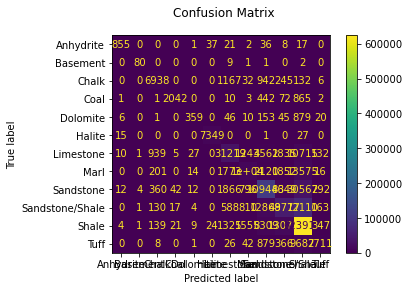

Accuracy: 0.8012404849168311

 -------------Classification Report-------------

                 precision    recall  f1-score   support

      Anhydrite       0.95      0.88      0.91       977
       Basement       0.92      0.86      0.89        93
          Chalk       0.80      0.73      0.76      9462
           Coal       0.96      0.59      0.73      3438
       Dolomite       0.84      0.24      0.37      1519
         Halite       0.99      0.99      0.99      7392
      Limestone       0.82      0.62      0.70     50688
           Marl       0.70      0.35      0.46     29996
      Sandstone       0.78      0.72      0.75    152043
Sandstone/Shale       0.65      0.36      0.46    135409
          Shale       0.82      0.96      0.88    648722
           Tuff       0.73      0.20      0.31     13720

       accuracy                           0.80   1053459
      macro avg       0.83      0.62      0.69   1053459
   weighted avg       0.79      0.80      0.78   1053459



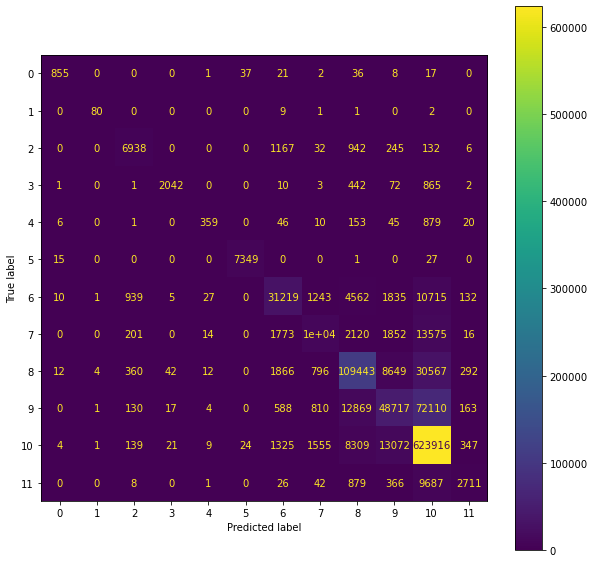

In [ ]:
tempa = clf.predict(X_train)

true_lithofacies = Y_train # ADM['Lithofacies']

predicted_output = tempa
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




In [ ]:
cut_labels_4 = ['bronze', 'silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext_price'], bins =5,  labels=cut_labels_4)

In [ ]:
label_gr = ['G0' , 'G1', 'G2', 'G3']
ADM['MGR'] = pd.cut(ADM['GR'], bins = 4, labels = label_gr)

In [ ]:
ADM['MGR'].fillna('G4', inplace = True)

In [ ]:
ADM['MGR'].value_counts()

G1    670345
G0    327014
G2    144034
G3     22691
G4      6427
Name: MGR, dtype: int64

In [ ]:
ADM['MGR'].value_counts(dropna = False)

G1     670345
G0     327014
G2     144034
G3      22691
NaN      6427
Name: MGR, dtype: int64

In [ ]:
ADM['MRDEP'].value_counts()

R0    1139020
R4      19153
R1       8742
R2       2442
R3       1154
Name: MRDEP, dtype: int64

In [ ]:
ADM['MGR'].loc[100:2000]

100     G0
101     G0
102     G0
103     G0
104     G0
        ..
1996    G1
1997    G1
1998    G1
1999    G1
2000    G1
Name: MGR, Length: 1901, dtype: category
Categories (4, object): ['G0' < 'G1' < 'G2' < 'G3']

In [ ]:
ADM['MGR'].fillna({1:'G4'}, inplace = True)

In [ ]:
ADM['MRDEP'].replace(np.nan , 'R4', inplace = True)

In [ ]:
label_gr = ['G0' , 'G1', 'G2', 'G3']
ADM['MGR'] = pd.cut(ADM['GR'], bins = 4, labels = label_gr)
# ADM['MGR'].fillna('G4', inplace = True)
# ADM['MGR'].replace(np.nan , 'G4', inplace = True)


label_RD = ['R0' , 'R1', 'R2', 'R3']
ADM['MRDEP'] = pd.cut(ADM['RDEP'], bins = 4, labels = label_RD)
# ADM['MRDEP'].fillna('R4', inplace = True)



label_DT = ['D0' , 'D1', 'D2', 'D3']
ADM['MDT'] = pd.cut(ADM['DTS'], bins = 4, labels = label_DT)
# ADM['MDT'].fillna('D4', inplace = True)



label_SP = ['S0' , 'S1', 'S2', 'S3']
ADM['MSP'] = pd.cut(ADM['SP'], bins = 4, labels = label_SP)
# ADM['MSP'].fillna('S4', inplace = True)



label_PE = ['P0' , 'P1', 'P2', 'P3']
ADM['MPEF'] = pd.cut(ADM['PEF'], bins = 4, labels = label_PE)
# ADM['MPEF'].fillna('P4', inplace = True)



label_B = ['B0' , 'B1', 'B2', 'B3']
ADM['MRHOB'] = pd.cut(ADM['RHOB'], bins = 4, labels = label_B)
# ADM['MRHOB'].fillna('B4', inplace = True)



label_NP = ['N0' , 'N1', 'N2', 'N3']
ADM['MNPHI'] = pd.cut(ADM['NPHI'], bins = 4, labels = label_NP)
# ADM['MNPHI'].fillna('N4', inplace = True)


label_DCB = ['C0' , 'C1', 'C2', 'C3']
ADM['MDCMB'] = pd.cut(ADM['DiffCminB'], bins = 4, labels = label_DCB)   
# ADM['MDCMB'].fillna('C4', inplace = True)



In [ ]:
ADM['MGR'] = pd.Categorical(ADM['MGR'])

In [ ]:
ADM['MGR'].fillna('G4', inplace = True)

ValueError: ignored

In [ ]:
ADM['MGR'].value_counts(dropna = False)

In [ ]:
for i in ['MGR', 'MRDEP', 'MDTC', 'MSP', 'MPEF', 'MRHOB', 'MNPHI']: # 'MDCMB']:
  print(ADM[i].value_counts(dropna = False))


G1    670345
G0    327014
G2    144034
G3     22691
G4      6427
Name: MGR, dtype: int64
R0    1139020
R4      19153
R1       8742
R2       2442
R3       1154
Name: MRDEP, dtype: int64
D1    816935
D0    154872
D2    117797
D4     80867
D3        40
Name: MDTC, dtype: int64
S2    627455
S4    330869
S3    148434
S1     46997
S0     16756
Name: MSP, dtype: int64
P4    557904
P1    376361
P2    143833
P0     52033
P3     40380
Name: MPEF, dtype: int64
B2    642528
B3    232587
B4    161435
B1    125599
B0      8362
Name: MRHOB, dtype: int64
N4    417022
N2    298298
N1    258297
N3    139234
N0     57660
Name: MNPHI, dtype: int64


In [ ]:
df['ext_price'].fillna('G5', inplace = True)

In [ ]:
.fillna('', inplace = True)

In [ ]:
# ADM['GR'] = [0 if x>1 else x for x in y]


# # https://pbpython.com/pandas-qcut-cut.html


# bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
# df['quantile_ex_3'] = pd.qcut(df['ext_price'],
#                               q=[0, .2, .4, .6, .8, 1],
#                               labels=bin_labels_5)
import pandas as pd 
import numpy as np
df = pd.DataFrame()
df['ext_price'] = [1,2,3,4,5,np.nan,7,8,9,1.1,1.2,1.3,2.3,2.4,2.5,3.3,3.4,3.5,11,12,13,14,np.nan, 12, np.nan]

In [ ]:
import pandas as pd 
import numpy as np
df = pd.DataFrame()
df['ext_price'] = [1,2,3,4,5,np.nan,7,8,9,1.1,1.2,1.3,2.3,2.4,2.5,3.3,3.4,3.5,11,12,13,14,np.nan, 12, np.nan]
df['ext_price1'] = [1,2,3,4,5,np.nan,7,8,9,1.1,1.2,1.3,2.3,2.4,2.5,3.3,3.4,3.5,11,12,13,14,np.nan, 12, np.nan]
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

# df['quantile_ex_3'] = pd.cut(df['ext_price'],                               q=[0, .2, .4, .6, .8, 1],                               labels=bin_labels_5)

In [ ]:
# df
# df['quantile_ex_2'] = pd.cut(df['ext_price'],                                                            labels=bin_labels_5) #   q=[0, .2, .4, .6, .8, 1],

cut_labels_4 = ['bronze', 'silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext_price'], bins =5,  labels=cut_labels_4) # bins=cut_bins,



In [ ]:
df['ext_price'] = np.where((df['ext_price']<=2) | (df['ext_price']>=10)   , np.nan, df['ext_price'])
# or df['ext_price']>=10

# df['A'] = df2['A'].apply(lambda x: x if x > cutoff else None)

In [ ]:
df['ext_price'].fillna('G5', inplace = True)

In [ ]:
df

,ext_price,ext_price1,cut_ex1
0,G5,1.0,bronze
1,G5,2.0,bronze
2,3.0,3.0,bronze
3,4.0,4.0,silver
4,5.0,5.0,silver
5,G5,NaN,NaN
6,7.0,7.0,gold
7,8.0,8.0,gold
8,9.0,9.0,platinum
9,G5,1.1,bronze


In [ ]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

# df = df.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_keys})
# df['DiffCminB'] = df['CALI'] - df['BS']
ADM = ADM.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_keys})
ADM['DiffCminB'] = ADM['CALI'] - ADM['BS']


# df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'Lithofacies'}, inplace=True)

# df.rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE':'Confidence'}, inplace=True)

ADM.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'Lithofacies'}, inplace=True)

ADM.rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE':'Confidence'}, inplace=True)



ADM.describe()
ADM['GR'] = ADM['GR'].clip(0,200)
ADM['RDEP'] = ADM['RDEP'].clip(0,100) # initially was 10, now we are keeping it at 30 # now based on - https://wiki.aapg.org/Well_log_analysis_for_reservoir_characterization
ADM['DTS'] = ADM['DTS'].clip(0,300)
ADM['SP'] = ADM['SP'].clip(-200,200)
ADM['PEF'] = ADM['PEF'].clip(0,10)  #
ADM['RHOB'] = ADM['RHOB'].clip(1,3)
ADM['NPHI'] = ADM['NPHI'].clip(0,0.6)
ADM['DiffCminB'] = ADM['DiffCminB'].clip(-0.5,0.5)


In [ ]:
ADM_train, ADM_test = train_test_split(ADM,    stratify=ADM['Lithofacies'],  test_size=0.9)

In [ ]:
ADM_train['Lithofacies'].value_counts()

Shale              72080
Sandstone          16894
Sandstone/Shale    15045
Limestone           5632
Marl                3333
Tuff                1525
Chalk               1051
Halite               821
Coal                 382
Dolomite             169
Anhydrite            109
Basement              10
Name: Lithofacies, dtype: int64

In [ ]:
ADM_test['Lithofacies'].value_counts()

Shale              648723
Sandstone          152043
Sandstone/Shale    135410
Limestone           50688
Marl                29996
Tuff                13720
Chalk                9462
Halite               7392
Coal                 3438
Dolomite             1519
Anhydrite             976
Basement               93
Name: Lithofacies, dtype: int64

In [ ]:
cc = 4

all_col_names = [ 'RDEP','RHOB', 'GR',  'NPHI', 'PEF',   'SP', 'DiffCminB' ] # ADM.columns

col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())




col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


col_name = all_col_names.pop(0)
new_col_name = col_name + 'kmeans'
temp = ADM_train[~ADM_train[col_name].isnull()][col_name]
kmeans_name = 'km'+ col_name
kmeans_name = KMeans(n_clusters=cc)
kmeans_name.fit_predict(np.array(temp).reshape(-1,1))
def temp_kmeans(x):
  try:
    return kmeans_name.predict(np.array(x).reshape(-1,1))[0]
  except:
    return 'waste'
ADM_train[new_col_name] = ADM_train[col_name].apply(temp_kmeans)

print(col_name)
print(ADM_train[new_col_name].value_counts())


RDEP
0        105245
3          8574
waste      1129
2          1092
1          1011
Name: RDEPkmeans, dtype: int64
RHOB
0        32005
3        31463
1        30301
waste    16185
2         7097
Name: RHOBkmeans, dtype: int64
GR
3    43754
1    34582
0    32874
2     5841
Name: GRkmeans, dtype: int64
NPHI
waste    40574
2        23494
1        23239
0        17355
3        12389
Name: NPHIkmeans, dtype: int64
PEF
waste    49987
3        23539
1        22855
0        11835
2         8835
Name: PEFkmeans, dtype: int64
SP
3        40981
waste    30638
0        27777
1        14253
2         3402
Name: SPkmeans, dtype: int64
DiffCminB
waste    51389
0        31884
2        14793
3        13859
1         5126
Name: DiffCminBkmeans, dtype: int64


In [ ]:
ADM_train

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,Lithofacies,Confidence,DiffCminB,RDEPkmeans,RHOBkmeans,GRkmeans,NPHIkmeans,PEFkmeans,SPkmeans,DiffCminBkmeans
589187,31/2-8,3081.324980,526897.18750,6758499.5,-3054.991943,DUNLIN GP.,Statfjord Fm.,8.172490,NaN,1.960378,1.218915,2.336355,39.500889,41.170151,0.184438,3.868173,81.658516,63.535919,NaN,NaN,NaN,NaN,0.008056,NaN,NaN,NaN,NaN,Sandstone,1.0,NaN,0,3,1,3,3,3,waste
714988,33/9-1,542.730000,437780.34375,6791573.5,-517.729981,NORDLAND GP.,NaN,NaN,NaN,1.924083,2.469113,NaN,63.972099,NaN,NaN,NaN,148.765335,52.617527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shale,1.0,NaN,0,waste,3,waste,waste,3,waste
279591,25/2-7,2715.482001,479860.62500,6641102.5,-2689.993652,SHETLAND GP.,Vaale Fm.,12.352671,22.212952,22.212952,17.214592,2.645641,14.683040,NaN,0.044903,4.733836,60.003704,24.197260,12.250001,NaN,NaN,NaN,-0.009734,NaN,NaN,NaN,NaN,Limestone,1.0,0.10267,3,1,1,3,3,0,2
629494,31/3-3,1655.602000,545909.81250,6744796.5,-1628.158447,VIKING GP.,Draupne Fm.,18.924170,1.701000,1.701263,1.414302,2.104017,67.300262,NaN,0.482711,NaN,119.350113,58.844074,12.250001,NaN,NaN,NaN,0.114232,NaN,NaN,NaN,NaN,Shale,1.0,0.50000,0,0,3,0,waste,3,0
837251,34/11-2 S,4476.944000,467292.90625,6788065.5,-4335.686523,DUNLIN GP.,Cook Fm.,9.094935,NaN,11.454423,10.989900,2.668848,87.737404,NaN,0.151413,3.446948,75.596275,-32.579964,NaN,NaN,NaN,NaN,0.002552,NaN,NaN,2.20672,-999.0,Shale,1.0,NaN,3,1,0,3,1,0,waste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,7/1-1,1188.248800,450394.84375,6406645.5,-1154.233765,HORDALAND GP.,NaN,18.307701,0.985386,0.986119,0.901583,NaN,53.579945,NaN,NaN,NaN,NaN,36.093071,17.500000,0.671354,NaN,0.807700,NaN,1.497830,NaN,NaN,NaN,Shale,1.0,0.50000,0,waste,3,waste,waste,0,0
106123,16/11-1 ST3,1989.505201,NaN,NaN,NaN,SHETLAND GP.,Hod Fm.,13.141303,1.034437,NaN,NaN,2.416064,10.416368,NaN,0.163558,NaN,85.290169,NaN,12.250001,10.333072,NaN,NaN,0.003464,1.389986,NaN,NaN,NaN,Chalk,1.0,0.50000,waste,3,1,3,waste,waste,0
788192,34/10-33,3479.328000,457837.18750,6777173.5,-3443.849365,DUNLIN GP.,Drake Fm.,9.932111,3.300961,NaN,2.703845,2.288481,121.359100,NaN,0.309905,NaN,91.208366,NaN,8.500000,NaN,NaN,NaN,-0.079552,NaN,NaN,NaN,NaN,Shale,1.0,0.50000,0,3,0,2,waste,waste,0
659591,31/4-5,2426.348796,503113.59375,6713725.5,-2400.436035,DUNLIN GP.,Drake Fm.,12.416780,NaN,3.696066,2.707730,2.448541,90.911285,94.448174,0.336939,4.358361,100.413307,117.000725,NaN,NaN,NaN,NaN,0.029773,NaN,NaN,NaN,NaN,Shale,1.0,NaN,0,3,0,1,3,1,waste


In [ ]:
new_col_name

'RDEPkmeans'

In [ ]:
ADM_train.to_csv('only7_train10.csv')

In [ ]:

ADM_train = pd.read_csv('only7_train.csv')

In [ ]:
ADM_train['DiffCminBkmeans'].value_counts()

waste    51389
0        31884
2        14793
3        13859
1         5126
Name: DiffCminBkmeans, dtype: int64

In [ ]:
list_start = ['R', 'D', 'G', 'P', 'E', 'S', 'B'] # ,'P','D','X','W','O','L','J','Y','Q','U','Z','F','T']

print(len(['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']))

def modifyname(x): 
  if x == 'waste' :
    return 'waste'
  else:
    return  str(temp_start + str(x))


for iter in ['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']: 
       temp_start = list_start.pop(0)
       ADM_train[iter] = ADM_train[iter].apply(modifyname)



7


In [ ]:
ADM_train

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,Lithofacies,Confidence,DiffCminB,RDEPkmeans,RHOBkmeans,GRkmeans,NPHIkmeans,PEFkmeans,SPkmeans,DiffCminBkmeans
589187,31/2-8,3081.324980,526897.18750,6758499.5,-3054.991943,DUNLIN GP.,Statfjord Fm.,8.172490,NaN,1.960378,1.218915,2.336355,39.500889,41.170151,0.184438,3.868173,81.658516,63.535919,NaN,NaN,NaN,NaN,0.008056,NaN,NaN,NaN,NaN,Sandstone,1.0,NaN,R0,D3,G1,P3,E3,S3,waste
714988,33/9-1,542.730000,437780.34375,6791573.5,-517.729981,NORDLAND GP.,NaN,NaN,NaN,1.924083,2.469113,NaN,63.972099,NaN,NaN,NaN,148.765335,52.617527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R0,waste,G3,waste,waste,S3,waste
279591,25/2-7,2715.482001,479860.62500,6641102.5,-2689.993652,SHETLAND GP.,Vaale Fm.,12.352671,22.212952,22.212952,17.214592,2.645641,14.683040,NaN,0.044903,4.733836,60.003704,24.197260,12.250001,NaN,NaN,NaN,-0.009734,NaN,NaN,NaN,NaN,Limestone,1.0,0.10267,R3,D1,G1,P3,E3,S0,B2
629494,31/3-3,1655.602000,545909.81250,6744796.5,-1628.158447,VIKING GP.,Draupne Fm.,18.924170,1.701000,1.701263,1.414302,2.104017,67.300262,NaN,0.482711,NaN,119.350113,58.844074,12.250001,NaN,NaN,NaN,0.114232,NaN,NaN,NaN,NaN,Shale,1.0,0.50000,R0,D0,G3,P0,waste,S3,B0
837251,34/11-2 S,4476.944000,467292.90625,6788065.5,-4335.686523,DUNLIN GP.,Cook Fm.,9.094935,NaN,11.454423,10.989900,2.668848,87.737404,NaN,0.151413,3.446948,75.596275,-32.579964,NaN,NaN,NaN,NaN,0.002552,NaN,NaN,2.20672,-999.0,Shale,1.0,NaN,R3,D1,G0,P3,E1,S0,waste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,7/1-1,1188.248800,450394.84375,6406645.5,-1154.233765,HORDALAND GP.,NaN,18.307701,0.985386,0.986119,0.901583,NaN,53.579945,NaN,NaN,NaN,NaN,36.093071,17.500000,0.671354,NaN,0.807700,NaN,1.497830,NaN,NaN,NaN,Shale,1.0,0.50000,R0,waste,G3,waste,waste,S0,B0
106123,16/11-1 ST3,1989.505201,NaN,NaN,NaN,SHETLAND GP.,Hod Fm.,13.141303,1.034437,NaN,NaN,2.416064,10.416368,NaN,0.163558,NaN,85.290169,NaN,12.250001,10.333072,NaN,NaN,0.003464,1.389986,NaN,NaN,NaN,Chalk,1.0,0.50000,waste,D3,G1,P3,waste,waste,B0
788192,34/10-33,3479.328000,457837.18750,6777173.5,-3443.849365,DUNLIN GP.,Drake Fm.,9.932111,3.300961,NaN,2.703845,2.288481,121.359100,NaN,0.309905,NaN,91.208366,NaN,8.500000,NaN,NaN,NaN,-0.079552,NaN,NaN,NaN,NaN,Shale,1.0,0.50000,R0,D3,G0,P2,waste,waste,B0
659591,31/4-5,2426.348796,503113.59375,6713725.5,-2400.436035,DUNLIN GP.,Drake Fm.,12.416780,NaN,3.696066,2.707730,2.448541,90.911285,94.448174,0.336939,4.358361,100.413307,117.000725,NaN,NaN,NaN,NaN,0.029773,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R0,D3,G0,P1,E3,S1,waste


In [ ]:
ADM_train['team'] =  ADM_train[['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']].agg(' '.join, axis=1)

In [ ]:
ADM_train['team']

589187              R0 D3 G1 P3 E3 S3 waste
714988     R0 waste G3 waste waste S3 waste
279591                 R3 D1 G1 P3 E3 S0 B2
629494              R0 D0 G3 P0 waste S3 B0
837251              R3 D1 G0 P3 E1 S0 waste
                         ...               
1157848       R0 waste G3 waste waste S0 B0
106123        waste D3 G1 P3 waste waste B0
788192           R0 D3 G0 P2 waste waste B0
659591              R0 D3 G0 P1 E3 S1 waste
294258              R0 D0 G3 waste E1 S3 B2
Name: team, Length: 117051, dtype: object

In [ ]:
def convert_set(x):
  temp = [] 
  for iter in x.split():
    if iter != 'waste':
      temp = temp + [iter]
  return temp 
ADM_train['node_list'] = ADM_train['team'].apply(convert_set)

In [ ]:
ADM_train['node_list']

589187         [R0, D3, G1, P3, E3, S3]
714988                     [R0, G3, S3]
279591     [R3, D1, G1, P3, E3, S0, B2]
629494         [R0, D0, G3, P0, S3, B0]
837251         [R3, D1, G0, P3, E1, S0]
                       ...             
1157848                [R0, G3, S0, B0]
106123                 [D3, G1, P3, B0]
788192             [R0, D3, G0, P2, B0]
659591         [R0, D3, G0, P1, E3, S1]
294258         [R0, D0, G3, E1, S3, B2]
Name: node_list, Length: 117051, dtype: object

In [ ]:

def get_columns(classes, order=2, initials=None):
    from itertools import combinations
    # Initial of logs
    if not initials:
        initials = []
        for i in range(len(classes)):
            initials.append(chr(i+65))    
    # Generating first order headers
    columns = []
    for i, ltr in enumerate(initials):
        for j in range(classes[i]):
            columns.append(ltr+str(j))
    
    ######## generating headers  ###########       
    #first order
    cn = []    
    #second order onwards
    for n in range(2,order+1):
        comb = combinations(columns,n)
        for i in list(comb):
            string = ''.join(i)
            flag = 1
            for ltr in initials:
                if string.count(ltr)>1 :
                    flag = 0
                    break
            if flag:
                cn.append(string)
    columns.extend(cn)
    return columns


c = get_columns([4,4,4,4,4,4,4], order=3, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(len(c))



2604


In [ ]:
print(ADM_train.index)

Int64Index([ 589187,  714988,  279591,  629494,  837251,  976847, 1055164,
            1036111,  562872,  536778,
            ...
             858878,  375492,  269428,  731013,  821969, 1157848,  106123,
             788192,  659591,  294258],
           dtype='int64', length=117051)


In [ ]:
ADM_train[c] = 0 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [ ]:
temp_adm_train = pd.DataFrame(data=0, index=ADM_train.index, columns=c, dtype=np.int8 )

In [ ]:
temp_adm_train['Lithofacies'] = ADM_train['Lithofacies']
temp_adm_train['node_list'] = ADM_train['node_list']

In [ ]:
# temp_adm_train.save

In [ ]:
# print(len(ADM_train.columns))
from itertools import combinations
def branches(temp,order =3):
  total = [] 
  for i in range(1,order+1):
    comb = combinations(temp,i)
    for iter in comb:
      string = ''.join(iter)
      total += [string]
  return total


temp_adm_train['col_name_list'] = temp_adm_train['node_list'].apply(branches)

In [ ]:
temp_adm_train['col_name_list']

589187     [R0, D3, G1, P3, E3, S3, R0D3, R0G1, R0P3, R0E...
714988                [R0, G3, S3, R0G3, R0S3, G3S3, R0G3S3]
279591     [R3, D1, G1, P3, E3, S0, B2, R3D1, R3G1, R3P3,...
629494     [R0, D0, G3, P0, S3, B0, R0D0, R0G3, R0P0, R0S...
837251     [R3, D1, G0, P3, E1, S0, R3D1, R3G0, R3P3, R3E...
                                 ...                        
1157848    [R0, G3, S0, B0, R0G3, R0S0, R0B0, G3S0, G3B0,...
106123     [D3, G1, P3, B0, D3G1, D3P3, D3B0, G1P3, G1B0,...
788192     [R0, D3, G0, P2, B0, R0D3, R0G0, R0P2, R0B0, D...
659591     [R0, D3, G0, P1, E3, S1, R0D3, R0G0, R0P1, R0E...
294258     [R0, D0, G3, E1, S3, B2, R0D0, R0G3, R0E1, R0S...
Name: col_name_list, Length: 117051, dtype: object

In [ ]:
for col_name in c: # ['E1R11', 'E1B4', 'E1G11', 'R11B4', 'R11G11', 'B4G11']:
  temp_adm_train[col_name] = temp_adm_train['col_name_list'].apply(lambda x: 1 if col_name in x else 0)

In [ ]:
# temp_adm_train.to_csv('post_increment_train10.csv')
temp_adm_train = pd.read_csv('post_increment_train10.csv')

In [ ]:
temp_adm_train.set_index('Unnamed: 0', inplace = True)


In [ ]:
temp_adm_train

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,...,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3,Lithofacies,node_list,col_name_list
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sandstone,"['R0', 'D3', 'G1', 'P3', 'E3', 'S3']","['R0', 'D3', 'G1', 'P3', 'E3', 'S3', 'R0D3', '..."
714988,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'G3', 'S3']","['R0', 'G3', 'S3', 'R0G3', 'R0S3', 'G3S3', 'R0..."
279591,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Limestone,"['R3', 'D1', 'G1', 'P3', 'E3', 'S0', 'B2']","['R3', 'D1', 'G1', 'P3', 'E3', 'S0', 'B2', 'R3..."
629494,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'D0', 'G3', 'P0', 'S3', 'B0']","['R0', 'D0', 'G3', 'P0', 'S3', 'B0', 'R0D0', '..."
837251,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R3', 'D1', 'G0', 'P3', 'E1', 'S0']","['R3', 'D1', 'G0', 'P3', 'E1', 'S0', 'R3D1', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'G3', 'S0', 'B0']","['R0', 'G3', 'S0', 'B0', 'R0G3', 'R0S0', 'R0B0..."
106123,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chalk,"['D3', 'G1', 'P3', 'B0']","['D3', 'G1', 'P3', 'B0', 'D3G1', 'D3P3', 'D3B0..."
788192,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'D3', 'G0', 'P2', 'B0']","['R0', 'D3', 'G0', 'P2', 'B0', 'R0D3', 'R0G0',..."


In [ ]:
# temp_adm_train.index = temp_adm_train['Unnamed: 0']

In [ ]:
temp_adm_train[c]

NameError: ignored

In [ ]:
# ADM_train.to_csv('post_increment.csv')
# ADM_train = pd.read_csv('post_increment.csv')
# https://towardsdatascience.com/memory-efficient-data-science-types-53423d48ba1d
# memory efficient savinf of df e

In [ ]:
 ['Lithofacies'] +c

In [ ]:
# for lithoname in ['Anhydrite', 'Chalk', 'Coal', 'Dolomite', 'Halite', 'Limestone', 'Marl',        'Sandstone', 'Sandstone/Shale', 'Shale', 'Tuff', 'Basement'] : 
#   aggregate_df['lithoname'] = temp_adm_train.groupby(['Lithofacies']).sum()
# # df.groupby(['Animal']).mean()

NameError: ignored

In [ ]:
temp_adm_train

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,...,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3,Lithofacies,node_list,col_name_list
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sandstone,"['R0', 'D3', 'G1', 'P3', 'E3', 'S3']","['R0', 'D3', 'G1', 'P3', 'E3', 'S3', 'R0D3', '..."
714988,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'G3', 'S3']","['R0', 'G3', 'S3', 'R0G3', 'R0S3', 'G3S3', 'R0..."
279591,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Limestone,"['R3', 'D1', 'G1', 'P3', 'E3', 'S0', 'B2']","['R3', 'D1', 'G1', 'P3', 'E3', 'S0', 'B2', 'R3..."
629494,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'D0', 'G3', 'P0', 'S3', 'B0']","['R0', 'D0', 'G3', 'P0', 'S3', 'B0', 'R0D0', '..."
837251,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R3', 'D1', 'G0', 'P3', 'E1', 'S0']","['R3', 'D1', 'G0', 'P3', 'E1', 'S0', 'R3D1', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'G3', 'S0', 'B0']","['R0', 'G3', 'S0', 'B0', 'R0G3', 'R0S0', 'R0B0..."
106123,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chalk,"['D3', 'G1', 'P3', 'B0']","['D3', 'G1', 'P3', 'B0', 'D3G1', 'D3P3', 'D3B0..."
788192,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Shale,"['R0', 'D3', 'G0', 'P2', 'B0']","['R0', 'D3', 'G0', 'P2', 'B0', 'R0D3', 'R0G0',..."


In [ ]:
# aggregate_lithofacies = temp_adm_train.groupby(['Lithofacies']).sum()


In [ ]:
# aggregate_lithofacies_order1 = temp_adm_train[order1 + ['Lithofacies']].groupby(['Lithofacies']).sum()

# aggregate_lithofacies_order2 = temp_adm_train[order2 + ['Lithofacies']].groupby(['Lithofacies']).sum()


aggregate_lithofacies_order3 = temp_adm_train[order3 +['Lithofacies']].groupby(['Lithofacies']).sum()

In [ ]:
# aggregate_lithofacies_order1
# # aggregate_lithofacies_order1['sumorder1'] = aggregate_lithofacies_order1[order1].sum(axis=1)
# temptemptemp_order1 = aggregate_lithofacies_order1.copy()
# temptemptemp_order1[order1] = aggregate_lithofacies_order1[order1].div(aggregate_lithofacies_order1['sumorder1'],axis=0)


In [ ]:
# aggregate_lithofacies_order2
# aggregate_lithofacies_order2['sumorder2'] = aggregate_lithofacies_order2[order2].sum(axis=1)
# temptemptemp_order2 = aggregate_lithofacies_order2.copy()
# temptemptemp_order2[order2] = aggregate_lithofacies_order2[order2].div(aggregate_lithofacies_order2['sumorder2'],axis=0)


In [ ]:
aggregate_lithofacies_order3
aggregate_lithofacies_order3['sumorder3'] = aggregate_lithofacies_order3[order3].sum(axis=1)
temptemptemp_order3 = aggregate_lithofacies_order3.copy()
temptemptemp_order3[order3] = aggregate_lithofacies_order3[order3].div(aggregate_lithofacies_order3['sumorder3'],axis=0)


In [ ]:
temptemptemp_order3

,R0D0G0,R0D0G1,R0D0G2,R0D0G3,R0D0P0,R0D0P1,R0D0P2,R0D0P3,R0D0E0,R0D0E1,R0D0E2,R0D0E3,R0D0S0,R0D0S1,R0D0S2,R0D0S3,R0D0B0,R0D0B1,R0D0B2,R0D0B3,R0D1G0,R0D1G1,R0D1G2,R0D1G3,R0D1P0,R0D1P1,R0D1P2,R0D1P3,R0D1E0,R0D1E1,R0D1E2,R0D1E3,R0D1S0,R0D1S1,R0D1S2,R0D1S3,R0D1B0,R0D1B1,R0D1B2,R0D1B3,...,E1S2B0,E1S2B1,E1S2B2,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3
Lithofacies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anhydrite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000747,0.000000,0.000000,0.000000,0.000000,0.000747,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Basement,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chalk,0.000000,0.002086,0.000000,0.000613,0.000000,0.000245,0.000123,0.000000,0.000061,0.000061,0.000000,0.000184,0.000184,0.000000,0.000000,0.000675,0.000675,0.000000,0.000000,0.000000,0.000000,0.018402,0.000000,0.000000,0.000000,0.000000,0.000368,0.017972,0.004907,0.000000,0.000736,0.004600,0.007299,0.001533,0.000000,0.009507,0.010428,0.000736,0.002638,0.003864,...,0.000000,0.00000,0.000000,0.000000,0.000123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000797,0.000123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000552,0.001043,0.000000,0.000000,0.000000,0.000000,0.000981,0.000491,0.000491,0.002024
Coal,0.003024,0.001008,0.000560,0.001456,0.002464,0.002016,0.001232,0.000224,0.000784,0.000672,0.001008,0.001680,0.001456,0.000896,0.000000,0.002688,0.002128,0.000112,0.000448,0.000896,0.000672,0.000112,0.000000,0.000224,0.000112,0.000448,0.000224,0.000224,0.000224,0.000000,0.000112,0.000336,0.000000,0.000112,0.000112,0.000336,0.000112,0.000000,0.000112,0.000224,...,0.000112,0.00000,0.000448,0.000000,0.003695,0.000000,0.001120,0.000224,0.002464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002016,0.000112,0.000000,0.000000,0.000112,0.000000,0.000112,0.000112,0.000560,0.000000,0.000112,0.000224,0.000000,0.000000,0.000224,0.000000,0.001120,0.000000,0.000000,0.000112
Dolomite,0.001675,0.007538,0.000000,0.003350,0.002094,0.001256,0.000419,0.000000,0.001256,0.003769,0.002094,0.001256,0.002094,0.000000,0.000000,0.010469,0.004188,0.000000,0.000000,0.000000,0.001256,0.008794,0.000000,0.005444,0.000419,0.003350,0.007956,0.001256,0.001675,0.001675,0.000419,0.003350,0.001256,0.001256,0.000000,0.009631,0.002513,0.001256,0.002094,0.004188,...,0.000000,0.00000,0.000000,0.000000,0.005863,0.0

In [ ]:
# temptemptemp_order1.drop(columns=['sumorder1'], inplace = True)



In [ ]:
# temptemptemp_order2.drop(columns=['sumorder2'], inplace = True)



In [ ]:
temptemptemp_order3.drop(columns=['sumorder3'], inplace = True)



In [ ]:
# true_lithofacies  = temp_adm_train['Lithofacies'].copy()
# temp_adm_train.drop(columns = ['Lithofacies',	'node_list',	'col_name_list'], inplace = True)
# temp_adm_train_order1 =  temp_adm_train[order1].copy()
# temp_adm_train_order1

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
714988,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
279591,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
629494,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
837251,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
106123,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
788192,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# true_lithofacies  = temp_adm_train['Lithofacies'].copy()
# temp_adm_train.drop(columns = ['Lithofacies',	'node_list',	'col_name_list'], inplace = True)
# temp_adm_train_order2 =  temp_adm_train[order2].copy()
# temp_adm_train_order2

,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,R0E0,R0E1,R0E2,R0E3,R0S0,R0S1,R0S2,R0S3,R0B0,R0B1,R0B2,R0B3,R1D0,R1D1,R1D2,R1D3,R1G0,R1G1,R1G2,R1G3,R1P0,R1P1,R1P2,R1P3,R1E0,R1E1,R1E2,R1E3,...,E1S0,E1S1,E1S2,E1S3,E1B0,E1B1,E1B2,E1B3,E2S0,E2S1,E2S2,E2S3,E2B0,E2B1,E2B2,E2B3,E3S0,E3S1,E3S2,E3S3,E3B0,E3B1,E3B2,E3B3,S0B0,S0B1,S0B2,S0B3,S1B0,S1B1,S1B2,S1B3,S2B0,S2B1,S2B2,S2B3,S3B0,S3B1,S3B2,S3B3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714988,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
279591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
629494,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
837251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788192,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_adm_train_order3 =  temp_adm_train[order3].copy()
temp_adm_train_order3

,R0D0G0,R0D0G1,R0D0G2,R0D0G3,R0D0P0,R0D0P1,R0D0P2,R0D0P3,R0D0E0,R0D0E1,R0D0E2,R0D0E3,R0D0S0,R0D0S1,R0D0S2,R0D0S3,R0D0B0,R0D0B1,R0D0B2,R0D0B3,R0D1G0,R0D1G1,R0D1G2,R0D1G3,R0D1P0,R0D1P1,R0D1P2,R0D1P3,R0D1E0,R0D1E1,R0D1E2,R0D1E3,R0D1S0,R0D1S1,R0D1S2,R0D1S3,R0D1B0,R0D1B1,R0D1B2,R0D1B3,...,E1S2B0,E1S2B1,E1S2B2,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
279591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
629494,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# new_df = true_lithofacies.to_frame()
# new_df.reset_index(inplace = True)

In [ ]:
new_df = pd.DataFrame()

In [ ]:
# def predictedoutput(x):
#   tempnow = temp_adm_train_order1.loc[int(x),:]
#   return temptemptemp_order1.multiply(tempnow).sum(axis=1).idxmax()



# new_df['predicted_change_order1'] = new_df['Unnamed: 0'].apply(predictedoutput)

In [ ]:
# def predictedoutput(x):
#   tempnow = temp_adm_train_order2.loc[int(x),:]
#   return temptemptemp_order2.multiply(tempnow).sum(axis=1).idxmax()



# new_df['predicted_change_order2'] = new_df['Unnamed: 0'].apply(predictedoutput)

In [ ]:
def predictedoutput(x):
  tempnow = temp_adm_train_order3.loc[int(x),:]
  return temptemptemp_order3.multiply(tempnow).sum(axis=1).idxmax()



new_df['predicted_change_order3'] = new_df['Unnamed: 0'].apply(predictedoutput)

Confusion matrix:
[[   83     6     2     0     1    17     0     0     0     0     0     0]
 [    1     9     0     0     0     0     0     0     0     0     0     0]
 [  178    27   717     9     8     6    22    10     0     0     0    74]
 [    5    12    32   204     4     4     1    10     4    13    42    51]
 [   19    19     3     0    35     0     4    18     0     6    10    55]
 [  378     0     0     1     0   442     0     0     0     0     0     0]
 [  659   952  1800    26   229    12   479   557    55   134   184   545]
 [  152    85   699     3    86     2   130  1486    41   119   137   393]
 [  921  1104  3378   498  1339   285   231   978  2491   947   361  4361]
 [ 1109   719  1453   463   820     9   423  1766   430  2955   967  3931]
 [ 2472   805  2877  2626  2532    34   651  7742  1101  6191 19135 25914]
 [   56     3   107     4    59     0     0    57     8     0    40  1191]]


<Figure size 1152x1152 with 0 Axes>

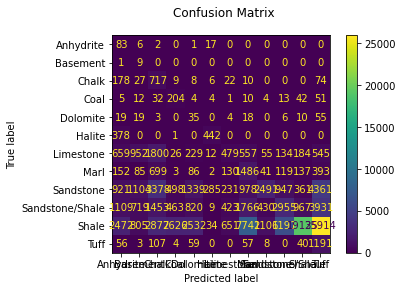

Accuracy: 0.24969457757729538

 -------------Classification Report-------------

                 precision    recall  f1-score   support

      Anhydrite       0.01      0.76      0.03       109
       Basement       0.00      0.90      0.00        10
          Chalk       0.06      0.68      0.12      1051
           Coal       0.05      0.53      0.10       382
       Dolomite       0.01      0.21      0.01       169
         Halite       0.55      0.54      0.54       821
      Limestone       0.25      0.09      0.13      5632
           Marl       0.12      0.45      0.19      3333
      Sandstone       0.60      0.15      0.24     16894
Sandstone/Shale       0.29      0.20      0.23     15045
          Shale       0.92      0.27      0.41     72080
           Tuff       0.03      0.78      0.06      1525

       accuracy                           0.25    117051
      macro avg       0.24      0.46      0.17    117051
   weighted avg       0.71      0.25      0.34    117051



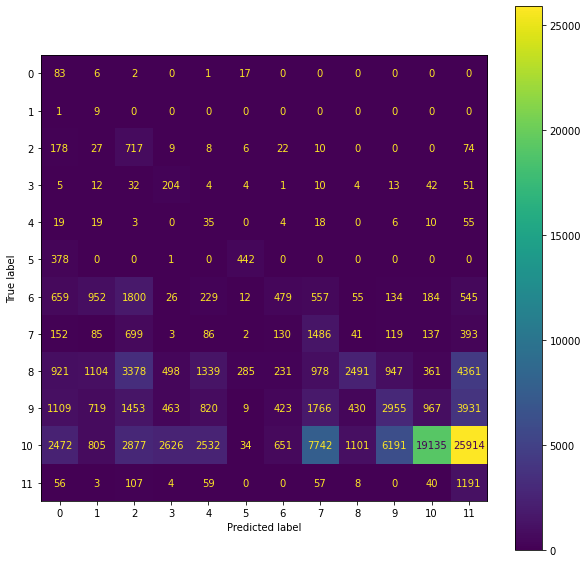

In [ ]:
predicted_output = new_df['predicted_change_order3']
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators = 5000, max_depth=100,  min_samples_split=2,  random_state=0)
X = temp_adm_train[order3] 
y = temp_adm_train['Lithofacies']
clf.fit(X, y)
new_df['predicted_change_rf_order3'] = clf.predict(X)


In [ ]:
true_lithofacies = temp_adm_train['Lithofacies']

In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators = 5000, max_depth=100,  min_samples_split=2,  random_state=0)
X = temp_adm_train[order3] 
y = temp_adm_train['Lithofacies']
clf.fit(X, y)
new_df['predicted_change_rf_order3'] = clf.predict(X)


true_lithofacies = temp_adm_train['Lithofacies']

predicted_output = new_df['predicted_change_rf_order3']
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




NameError: ignored

In [ ]:
aggregate_lithofacies.index

Index(['Anhydrite', 'Basement', 'Chalk', 'Coal', 'Dolomite', 'Halite',
       'Limestone', 'Marl', 'Sandstone', 'Sandstone/Shale', 'Shale', 'Tuff'],
      dtype='object', name='Lithofacies')

In [ ]:
order1 = get_columns([4,4,4,4,4,4,4], order=1, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(order1)

order2 = get_columns([4,4,4,4,4,4,4], order=2, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
# print(order2-order1)
print(len(order2))


order3 = get_columns([4,4,4,4,4,4,4], order=3, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(order3)
print(len(order3))



['R0', 'R1', 'R2', 'R3', 'D0', 'D1', 'D2', 'D3', 'G0', 'G1', 'G2', 'G3', 'P0', 'P1', 'P2', 'P3', 'E0', 'E1', 'E2', 'E3', 'S0', 'S1', 'S2', 'S3', 'B0', 'B1', 'B2', 'B3']
364
['R0', 'R1', 'R2', 'R3', 'D0', 'D1', 'D2', 'D3', 'G0', 'G1', 'G2', 'G3', 'P0', 'P1', 'P2', 'P3', 'E0', 'E1', 'E2', 'E3', 'S0', 'S1', 'S2', 'S3', 'B0', 'B1', 'B2', 'B3', 'R0D0', 'R0D1', 'R0D2', 'R0D3', 'R0G0', 'R0G1', 'R0G2', 'R0G3', 'R0P0', 'R0P1', 'R0P2', 'R0P3', 'R0E0', 'R0E1', 'R0E2', 'R0E3', 'R0S0', 'R0S1', 'R0S2', 'R0S3', 'R0B0', 'R0B1', 'R0B2', 'R0B3', 'R1D0', 'R1D1', 'R1D2', 'R1D3', 'R1G0', 'R1G1', 'R1G2', 'R1G3', 'R1P0', 'R1P1', 'R1P2', 'R1P3', 'R1E0', 'R1E1', 'R1E2', 'R1E3', 'R1S0', 'R1S1', 'R1S2', 'R1S3', 'R1B0', 'R1B1', 'R1B2', 'R1B3', 'R2D0', 'R2D1', 'R2D2', 'R2D3', 'R2G0', 'R2G1', 'R2G2', 'R2G3', 'R2P0', 'R2P1', 'R2P2', 'R2P3', 'R2E0', 'R2E1', 'R2E2', 'R2E3', 'R2S0', 'R2S1', 'R2S2', 'R2S3', 'R2B0', 'R2B1', 'R2B2', 'R2B3', 'R3D0', 'R3D1', 'R3D2', 'R3D3', 'R3G0', 'R3G1', 'R3G2', 'R3G3', 'R3P0', 'R3P1', 'R

In [ ]:

def get_columns_only(classes, order=2, initials=None):
    from itertools import combinations
    # Initial of logs
    if not initials:
        initials = []
        for i in range(len(classes)):
            initials.append(chr(i+65))    
    # Generating first order headers
    columns = []
    for i, ltr in enumerate(initials):
        for j in range(classes[i]):
            columns.append(ltr+str(j))
    
    ######## generating headers  ###########       
    #first order
    cn = []    
    #second order onwards
    for n in range(order,order+1):
        comb = combinations(columns,n)
        for i in list(comb):
            string = ''.join(i)
            flag = 1
            for ltr in initials:
                if string.count(ltr)>1 :
                    flag = 0
                    break
            if flag:
                cn.append(string)
    # columns.extend(cn)
    return cn


c = get_columns([4,4,4,4,4,4,4], order=3, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(len(c))



2604


In [ ]:

order1 = get_columns([4,4,4,4,4,4,4], order=1, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(order1)
print(len(order1))

order2 = get_columns_only([4,4,4,4,4,4,4], order=2, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(order2)
print(len(order2))


order3 = get_columns_only([4,4,4,4,4,4,4], order=3, initials= ['R', 'D', 'G', 'P', 'E', 'S', 'B'])
print(order3)
print(len(order3))


print(len(order1) +len(order2)+len(order3))


['R0', 'R1', 'R2', 'R3', 'D0', 'D1', 'D2', 'D3', 'G0', 'G1', 'G2', 'G3', 'P0', 'P1', 'P2', 'P3', 'E0', 'E1', 'E2', 'E3', 'S0', 'S1', 'S2', 'S3', 'B0', 'B1', 'B2', 'B3']
28
['R0D0', 'R0D1', 'R0D2', 'R0D3', 'R0G0', 'R0G1', 'R0G2', 'R0G3', 'R0P0', 'R0P1', 'R0P2', 'R0P3', 'R0E0', 'R0E1', 'R0E2', 'R0E3', 'R0S0', 'R0S1', 'R0S2', 'R0S3', 'R0B0', 'R0B1', 'R0B2', 'R0B3', 'R1D0', 'R1D1', 'R1D2', 'R1D3', 'R1G0', 'R1G1', 'R1G2', 'R1G3', 'R1P0', 'R1P1', 'R1P2', 'R1P3', 'R1E0', 'R1E1', 'R1E2', 'R1E3', 'R1S0', 'R1S1', 'R1S2', 'R1S3', 'R1B0', 'R1B1', 'R1B2', 'R1B3', 'R2D0', 'R2D1', 'R2D2', 'R2D3', 'R2G0', 'R2G1', 'R2G2', 'R2G3', 'R2P0', 'R2P1', 'R2P2', 'R2P3', 'R2E0', 'R2E1', 'R2E2', 'R2E3', 'R2S0', 'R2S1', 'R2S2', 'R2S3', 'R2B0', 'R2B1', 'R2B2', 'R2B3', 'R3D0', 'R3D1', 'R3D2', 'R3D3', 'R3G0', 'R3G1', 'R3G2', 'R3G3', 'R3P0', 'R3P1', 'R3P2', 'R3P3', 'R3E0', 'R3E1', 'R3E2', 'R3E3', 'R3S0', 'R3S1', 'R3S2', 'R3S3', 'R3B0', 'R3B1', 'R3B2', 'R3B3', 'D0G0', 'D0G1', 'D0G2', 'D0G3', 'D0P0', 'D0P1', 'D0P2', 'D0

In [ ]:
aggregate_lithofacies['sumorder1'] = aggregate_lithofacies[order1].sum(axis=1)

aggregate_lithofacies['sumorder2'] = aggregate_lithofacies[order2].sum(axis=1)

aggregate_lithofacies['sumorder3'] = aggregate_lithofacies[order3].sum(axis=1)

In [ ]:
temptemptemp = aggregate_lithofacies.copy()

In [ ]:
aggregate_lithofacies['R0']

In [ ]:
aggregate_lithofacies['sumorder1']

In [ ]:
temptemptemp[order1] = aggregate_lithofacies[order1].div(aggregate_lithofacies['sumorder1'],axis=0)

temptemptemp[order2] = aggregate_lithofacies[order2].div(aggregate_lithofacies['sumorder2']/200,axis=0)

temptemptemp[order3] = aggregate_lithofacies[order3].div(aggregate_lithofacies['sumorder3']/20000,axis=0)

In [ ]:
# temptemptemp = temptemptemp[['sumorder1', 'sumorder2', 'sumorder3']].drop(inplace = True)

temptemptemp.drop(columns=['sumorder1', 'sumorder2', 'sumorder3'], inplace = True)



In [ ]:
true_lithofacies  = temp_adm_train['Lithofacies'].copy()
temp_adm_train.drop(columns = ['Lithofacies',	'node_list',	'col_name_list'], inplace = True)
temp_adm_train 

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,...,E1S2B0,E1S2B1,E1S2B2,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
589187,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714988,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
279591,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
629494,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837251,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157848,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106123,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788192,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
temptemptemp

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,...,E1S2B0,E1S2B1,E1S2B2,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3
Lithofacies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anhydrite,0.003643,0.085610,0.040073,0.012750,0.001821,0.183971,0.000000,0.012750,0.001821,0.194900,0.000000,0.001821,0.000000,0.000000,0.001821,0.194900,0.003643,0.000000,0.001821,0.009107,0.000000,0.023679,0.000000,0.067395,0.145719,0.000000,0.007286,0.005464,0.000000,0.042169,0.000000,0.042169,0.000000,0.084337,0.000000,0.000000,0.000000,0.000000,0.000000,0.042169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Basement,0.000000,0.000000,0.083333,0.083333,0.000000,0.166667,0.000000,0.000000,0.000000,0.150000,0.000000,0.016667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.050000,0.000000,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chalk,0.166607,0.000000,0.000000,0.003055,0.008986,0.059490,0.002516,0.096873,0.000000,0.181344,0.000000,0.007549,0.000000,0.005751,0.039360,0.102265,0.019231,0.000359,0.003055,0.027318,0.093458,0.005572,0.000000,0.043674,0.093638,0.002336,0.024982,0.012581,0.169710,1.157116,0.053999,1.743388,0.000000,3.413492,0.000000,0.161996,0.000000,0.100283,0.775268,1.808958,...,0.000000,0.000000,0.000000,0.000000,0.042078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273508,0.042078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189352,0.357664,0.000000,0.000000,0.000000,0.000000,0.336625,0.168313,0.168313,0.694289
Coal,0.086735,0.006378,0.012330,0.056973,0.038690,0.011905,0.087585,0.024235,0.050595,0.062925,0.005527,0.043367,0.070578,0.041241,0.020833,0.008503,0.010204,0.050170,0.028061,0.028061,0.045493,0.027636,0.006803,0.062075,0.067177,0.003827,0.025935,0.016156,0.428988,0.071498,0.889754,0.230383,0.595817,0.564040,0.103275,0.357490,0.548152,0.405156,0.238327,0.031777,...,0.038410,0.000000,0.153639,0.000000,1.267525,0.000000,0.384099,0.076820,0.845017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.691377,0.038410,0.000000,0.000000,0.038410,0.000000,0.038410,0.038410,0.192049,0.000000,0.038410,0.076820,0.000000,0.000000,0.076820,0.000000,0.384099,0.000000,0.000000,0.038410
Dolomite,0.154977,0.003394,0.005656,0.026018,0.033937,0.074661,0.001131,0.067873,0.023756,0.106335,0.005656,0.055430,0.015837,0.036199,0.036199,0.033937,0.013575,0.026018,0.007919,0.033937,0.026018,0.026018,0.001131,0.106335,0.047511,0.003394,0.011312,0.015837,0.747711,0.922177,0.024924,1.420651,0.523398,1.719736,0.124619,1.046796,0.348932,0.747711,0.722787,0.074771,...,0.000000,0.000000,0.000000,0.000000,2.010888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143635,0.000000,0.000000,0.000000

In [ ]:
true_lithofacies

Unnamed: 0
589187     Sandstone
714988         Shale
279591     Limestone
629494         Shale
837251         Shale
             ...    
1157848        Shale
106123         Chalk
788192         Shale
659591         Shale
294258         Shale
Name: Lithofacies, Length: 117051, dtype: object

In [ ]:
aggregate_lithofacies['sumorder1']

In [ ]:
# for indx in temp_adm_train.index:
#   tempnow = temp_adm_train.iloc[indx,:]
#   temptemptemp.multiply(tempnow).sum(axis=1).maxindex
# predicted_output = [] 
# for indx in temp_adm_train.index:
#   tempnow = temp_adm_train.loc[indx,:]
#   predicted_output.append(temptemptemp.multiply(tempnow).sum(axis=1).idxmax())

# # # indx = 279591
# # tempnow = temp_adm_train.loc[indx,:]
# # # print(tempnow)
# # print(temptemptemp.multiply(tempnow).sum(axis=1).idxmax())

# # # temptemptemp.multiply(temp_adm_train.

# # x is index 

# only_index = temp_adm_train.index
# def predictedoutput(x):
#   tempnow = temp_adm_train.iloc[int(x),:]
#   return temptemptemp.multiply(tempnow).sum(axis=1).idxmax()



In [ ]:
# true_lithofacies['only_index'] = temp_adm_train.index
# true_lithofacies.drop(index = 'only_index', inplace = True)
# true_lithofacies
# true_lithofacies.reset_index(inplace = True)
# true_lithofacies.index
# true_lithofacies.index.names = ['index']
# true_lithofacies.reset_index(inplace = True)
new_df = true_lithofacies.to_frame()
new_df.reset_index(inplace = True)

In [ ]:
new_df.reset_index(inplace = True)

In [ ]:
new_df

,index,Lithofacies,predicted,predicted_change,predicted_change_343,predicted_change_200_20000
0,589187,Sandstone,Chalk,Chalk,Chalk,Chalk
1,714988,Shale,Tuff,Tuff,Tuff,Tuff
2,279591,Limestone,Basement,Basement,Basement,Basement
3,629494,Shale,Tuff,Tuff,Tuff,Tuff
4,837251,Shale,Basement,Basement,Basement,Sandstone/Shale
...,...,...,...,...,...,...
117046,1157848,Shale,Tuff,Shale,Shale,Shale
117047,106123,Chalk,Anhydrite,Anhydrite,Anhydrite,Anhydrite
117048,788192,Shale,Chalk,Shale,Shale,Shale
117049,659591,Shale,Shale,Shale,Shale,Shale


In [ ]:
temp = (new_df['predicted_change'] == new_df['predicted'])
count = 0 
for i in temp:
  if i == True:
    count+=1

print(count/len(temp))

0.7948501080725495


In [ ]:
# new_df['predicted'] = new_df['index'].apply(predictedoutput)

# for x in new_df['index'][:10]:
#   print(x)
#   print(predictedoutput(x))

def predictedoutput(x):
  tempnow = temp_adm_train.loc[int(x),:]
  return temptemptemp.multiply(tempnow).sum(axis=1).idxmax()

# for x in new_df['index'][:10]:
#   print(x)
#   print(predictedoutput(x))

new_df['predicted_change_200_20000'] = new_df['index'].apply(predictedoutput)

# for indx in temp_adm_train.index:
#   tempnow = temp_adm_train.loc[indx,:]
#   predicted_output.append(temptemptemp.multiply(tempnow).sum(axis=1).idxmax())




In [ ]:
temp_adm_train.index

Int64Index([ 589187,  714988,  279591,  629494,  837251,  976847, 1055164,
            1036111,  562872,  536778,
            ...
             858878,  375492,  269428,  731013,  821969, 1157848,  106123,
             788192,  659591,  294258],
           dtype='int64', name='Unnamed: 0', length=117051)

Confusion matrix:
[[   83     6     2     0     1    17     0     0     0     0     0     0]
 [    1     9     0     0     0     0     0     0     0     0     0     0]
 [  178    27   718     9     6     6    22    14     0     0     0    71]
 [    5    14    56   165     4    14     1    12     4    11    40    56]
 [   13    20     5     0    23     0     4    22     0     5    19    58]
 [   52     0     0     1     0   768     0     0     0     0     0     0]
 [  618  1159  1663    26   143    15   478   565    47   109   192   617]
 [  143   114   729     3    85     2   135  1467    30   110   134   381]
 [  585  1232  3854   353   680   429   250   992  1886   873   469  5291]
 [  464   885  1579   397   412    14   421  1876   333  2604  1102  4958]
 [  435  1100  3498  2239   679   222   660  9051   771  5180 19925 28320]
 [    0     3   156     1    27     0     0    58     5     1    52  1222]]


<Figure size 1152x1152 with 0 Axes>

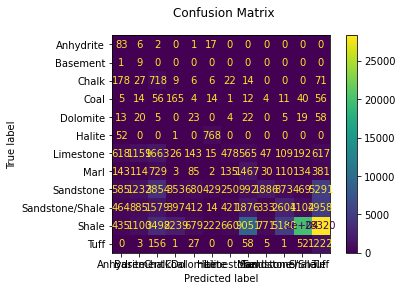

Accuracy: 0.250728315007988

 -------------Classification Report-------------

                 precision    recall  f1-score   support

      Anhydrite       0.03      0.76      0.06       109
       Basement       0.00      0.90      0.00        10
          Chalk       0.06      0.68      0.11      1051
           Coal       0.05      0.43      0.09       382
       Dolomite       0.01      0.14      0.02       169
         Halite       0.52      0.94      0.67       821
      Limestone       0.24      0.08      0.13      5632
           Marl       0.10      0.44      0.17      3333
      Sandstone       0.61      0.11      0.19     16894
Sandstone/Shale       0.29      0.17      0.22     15045
          Shale       0.91      0.28      0.42     72080
           Tuff       0.03      0.80      0.06      1525

       accuracy                           0.25    117051
      macro avg       0.24      0.48      0.18    117051
   weighted avg       0.70      0.25      0.33    117051



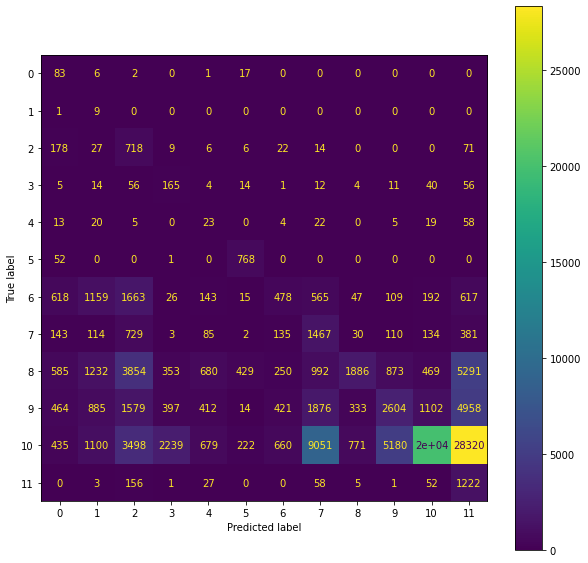

In [ ]:
predicted_output = new_df['predicted_change']
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




Confusion matrix:
[[   83     6     2     0     1    17     0     0     0     0     0     0]
 [    1     9     0     0     0     0     0     0     0     0     0     0]
 [  178    27   718     9     6     6    22    14     0     0     0    71]
 [    5    14    56   165     4    14     1    12     4    11    40    56]
 [   13    20     5     0    23     0     4    22     0     5    19    58]
 [   52     0     0     1     0   768     0     0     0     0     0     0]
 [  618  1159  1663    26   143    15   478   565    47   109   192   617]
 [  143   114   729     3    85     2   135  1467    30   110   134   381]
 [  585  1232  3854   353   680   429   250   992  1886   873   469  5291]
 [  464   885  1579   397   412    14   421  1876   333  2604  1102  4958]
 [  435  1100  3498  2239   679   222   660  9051   771  5180 19925 28320]
 [    0     3   156     1    27     0     0    58     5     1    52  1222]]


<Figure size 1152x1152 with 0 Axes>

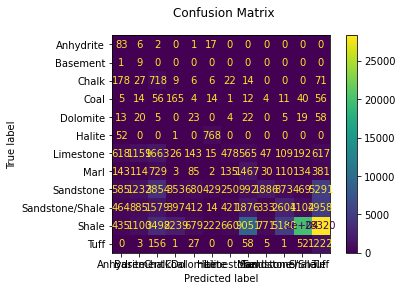

Accuracy: 0.250728315007988

 -------------Classification Report-------------

                 precision    recall  f1-score   support

      Anhydrite       0.03      0.76      0.06       109
       Basement       0.00      0.90      0.00        10
          Chalk       0.06      0.68      0.11      1051
           Coal       0.05      0.43      0.09       382
       Dolomite       0.01      0.14      0.02       169
         Halite       0.52      0.94      0.67       821
      Limestone       0.24      0.08      0.13      5632
           Marl       0.10      0.44      0.17      3333
      Sandstone       0.61      0.11      0.19     16894
Sandstone/Shale       0.29      0.17      0.22     15045
          Shale       0.91      0.28      0.42     72080
           Tuff       0.03      0.80      0.06      1525

       accuracy                           0.25    117051
      macro avg       0.24      0.48      0.18    117051
   weighted avg       0.70      0.25      0.33    117051



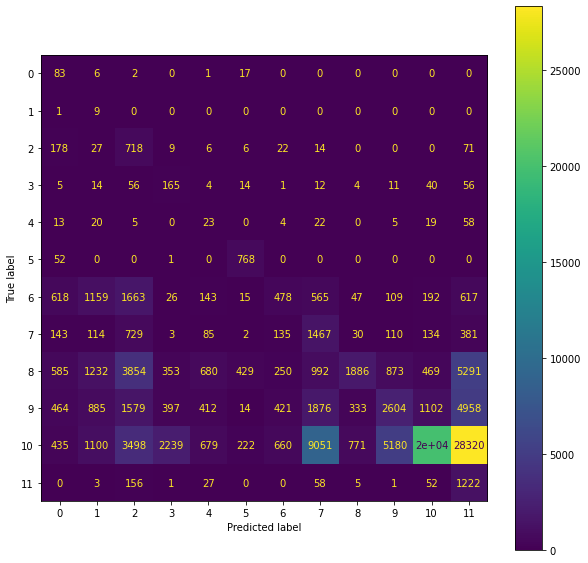

In [ ]:
predicted_output = new_df['predicted_change']
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() #  max_iter=100

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(16,8,4,2), (8,16,8), (4,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'], 'max_iter': [100, 200 ] 
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# temp_adm_train true_lithofacies


# temp = np.array(X_train).reshape(-1,1)
# temp = np.array(X_train)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(temp_adm_train, true_lithofacies)

In [ ]:
predicted_output = clf.predict(np.array(X_test).reshape(-1,1))

In [ ]:
# predicted_output = new_df['predicted_change']
# true_lithofacies[:100]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.figure(figsize = (16,16))
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies, predicted_output)
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()



import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_lithofacies, predicted_output)
cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)



# disp = metrics.ConfusionMatrixDisplay.from_predictions(true_lithofacies[:100], predicted_output)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

print("Accuracy:", accuracy_score(true_lithofacies, predicted_output))
print("\n -------------Classification Report-------------\n")
print(classification_report(true_lithofacies, predicted_output))




In [ ]:
aggregate_lithofacies[aggregate_lithofacies.index == "Basement"].sum(axis=1)

Lithofacies
Basement    410
dtype: int64

In [ ]:
aggregate_lithofacies.to_csv('aggregate_lithofacies.csv')

In [ ]:
temp_adm_train[temp_adm_train['Lithofacies'] == 'Basement'][['R2', 'R3', 'D1','G1', 'P0', 'P1']]

,R2,R3,D1,G1,P0,P1
156346,0,1,1,1,0,0
156364,0,1,1,1,0,0
156320,1,0,1,1,0,0
156327,0,1,1,1,0,0
156404,1,0,1,0,0,0
156322,1,0,1,1,0,0
156337,0,1,1,1,0,0
156361,1,0,1,1,0,0
156329,1,0,1,1,0,0
156379,0,1,1,1,0,0


In [ ]:
aggregate_df = pd.DataFrame(columns = c, index = ['Anhydrite', 'Chalk', 'Coal', 'Dolomite', 'Halite', 'Limestone', 'Marl',
       'Sandstone', 'Sandstone/Shale', 'Shale', 'Tuff', 'Basement'])
# tempdf.columns = colname n
# tempdf.describe()
# tempdf.shape
aggregate_df.loc[:,:] = 0 
aggregate_df

,R0,R1,R2,R3,D0,D1,D2,D3,G0,G1,G2,G3,P0,P1,P2,P3,E0,E1,E2,E3,S0,S1,S2,S3,B0,B1,B2,B3,R0D0,R0D1,R0D2,R0D3,R0G0,R0G1,R0G2,R0G3,R0P0,R0P1,R0P2,R0P3,...,E1S2B0,E1S2B1,E1S2B2,E1S2B3,E1S3B0,E1S3B1,E1S3B2,E1S3B3,E2S0B0,E2S0B1,E2S0B2,E2S0B3,E2S1B0,E2S1B1,E2S1B2,E2S1B3,E2S2B0,E2S2B1,E2S2B2,E2S2B3,E2S3B0,E2S3B1,E2S3B2,E2S3B3,E3S0B0,E3S0B1,E3S0B2,E3S0B3,E3S1B0,E3S1B1,E3S1B2,E3S1B3,E3S2B0,E3S2B1,E3S2B2,E3S2B3,E3S3B0,E3S3B1,E3S3B2,E3S3B3
Anhydrite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chalk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Coal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dolomite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Halite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Limestone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Marl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sandstone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sandstone/Shale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ADM.to_csv('only7.csv')

In [ ]:
# new_ADM = pd.read_csv('only7.csv')

In [ ]:
# ADM = new_ADM.copy()

In [ ]:
ADM['DiffCminBkmeans']

In [ ]:
ADM['DiffCminBkmeans'][1170510].pop()

AttributeError: ignored

In [ ]:
list_start = ['R', 'D', 'G', 'P', 'E', 'S', 'B'] # ,'P','D','X','W','O','L','J','Y','Q','U','Z','F','T']

print(len(['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']))

def modifyname(x): 
  if x == 'waste' :
    return 'waste'
  else:
    return  str(temp_start + str(x))


for iter in ['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']: 
       temp_start = list_start.pop(0)
       ADM[iter] = ADM[iter].apply(modifyname)



7


In [ ]:
ADM

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,Lithofacies,Confidence,DiffCminB,RDEPkmeans,RHOBkmeans,GRkmeans,NPHIkmeans,PEFkmeans,SPkmeans,DiffCminBkmeans
0,0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,10.000000,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R[,D[,G[,waste,E[,S[,waste
1,1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,10.000000,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R[,D[,G[,waste,E[,S[,waste
2,2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,10.000000,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R[,D[,G[,waste,E[,S[,waste
3,3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,10.000000,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R[,D[,G[,waste,E[,S[,waste
4,4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,10.000000,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,Shale,1.0,NaN,R[,D[,G[,waste,E[,S[,waste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,NaN,2.527984,77.654900,NaN,NaN,4.586425,NaN,NaN,8.5,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,Sandstone,2.0,-0.076830,waste,D[,G[,waste,E[,waste,B[
1170507,1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,NaN,2.537613,75.363937,NaN,NaN,7.019858,NaN,NaN,8.5,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,Sandstone/Shale,2.0,-0.120756,waste,D[,G[,waste,E[,waste,B[
1170508,1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,NaN,2.491860,66.452843,NaN,NaN,9.049782,NaN,NaN,8.5,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,Sandstone/Shale,2.0,-0.149752,waste,D[,G[,waste,E[,waste,B[
1170509,1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,NaN,2.447539,55.784817,NaN,NaN,8.903917,NaN,NaN,8.5,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,Sandstone/Shale,2.0,-0.186221,waste,D[,G[,waste,E[,waste,B[


In [ ]:
ADM[['RDEPkmeans', 'RHOBkmeans', 'GRkmeans', 'NPHIkmeans', 'PEFkmeans', 'SPkmeans','DiffCminBkmeans']]

,RDEPkmeans,RHOBkmeans,GRkmeans,NPHIkmeans,PEFkmeans,SPkmeans,DiffCminBkmeans
0,R[11],D[8],G[8],waste,E[1],S[9],waste
1,R[11],D[8],G[6],waste,E[1],S[9],waste
2,R[11],D[8],G[6],waste,E[1],S[9],waste
3,R[11],D[8],G[6],waste,E[1],S[9],waste
4,R[11],D[8],G[6],waste,E[1],S[9],waste
...,...,...,...,...,...,...,...
1170506,waste,D[0],G[6],waste,E[8],waste,B[9]
1170507,waste,D[0],G[6],waste,E[9],waste,B[0]
1170508,waste,D[0],G[0],waste,E[11],waste,B[0]
1170509,waste,D[7],G[5],waste,E[11],waste,B[6]
